In [2]:
library(tidyverse)

── Attaching packages ──────────────────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.5     ✔ purrr   0.3.4
✔ tibble  3.1.3     ✔ dplyr   1.0.7
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   2.0.0     ✔ forcats 0.5.1

── Conflicts ─────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



In [3]:
climate <- tibble(
  Month = 1:12,
  Temp = c(23,23,24,24,24,23,23,23,23,23,23,23),
  Precip = c(101,105,100,101,102, 112, 101, 121, 107, 114, 108, 120)
  )

Saving 7 x 7 in image



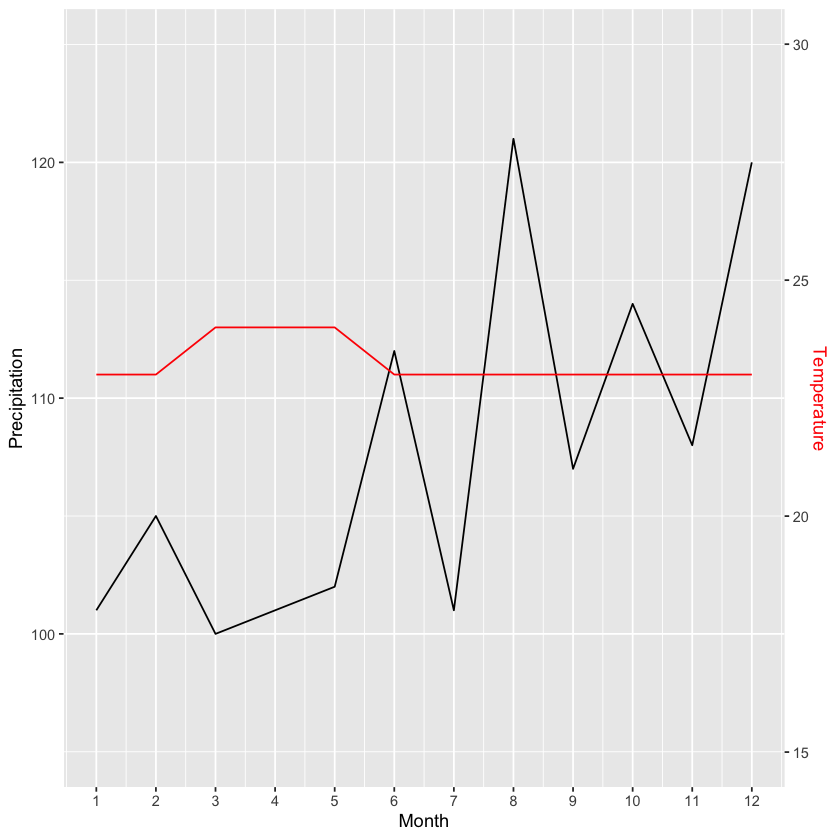

In [192]:
ylim.prim <- c(95, 125)   # in this example, precipitation
ylim.sec <- c(15, 30)    # in this example, temperature

# This is quite hacky, but it works if you want to set a boundary for the secondary y-axis
fit = lm(b ~ . + 0, 
   tibble::tribble(
     ~a, ~s,  ~b,
      1,  (ylim.sec[1] - mean(TEMP))/sd(TEMP),  ylim.prim[1],
      1,  (ylim.sec[2] - mean(TEMP))/sd(TEMP), ylim.prim[2]))

a <- fit$coefficients['a']
s <- fit$coefficients['s']

TEMP <- climate$Temp #needed for coherent normalisation

ggplot(climate, aes(Month, Precip)) +
  geom_line() + 
  geom_line(aes(y = (a + ((Temp - mean(TEMP))/sd(TEMP)) * s) ), color = "red") +
  scale_y_continuous("Precipitation", 
                     limits=ylim.prim,
                     sec.axis = sec_axis(~ (. - a) / s * sd(TEMP) + mean(TEMP), name = "Temperature"),) +
  scale_x_continuous("Month", breaks = 1:12) +
  theme(axis.title.y.right = element_text(colour = "red"))

ggsave("temp_precipitation_transformed_secaxis.jpg")

In [33]:
ylim.sec

[1] 15 30

In [34]:
ylim.prim

[1]  95 125

In [36]:
climate$Temp

[1] 23 23 24 24 24 23 23 23 23 23 23 23

In [114]:
((15 - mean(TEMP))/sd(TEMP))

[1] -18.24144

In [135]:
(95 - 105) / 0.5481

[1] -18.24485

In [136]:
a

[1] 105

In [74]:
sec_bounds = ((ylim.sec - mean(TEMP))/sd(TEMP)) # *scalingfactor
sec_bounds

[1] -18.24144  14.92481

In [83]:
a_new = ylim.prim[1] - sec_bounds[1]
a_new

[1] 113.2414

In [91]:
scalingfactor_new = (sec_bounds[2] + a_new) / ylim.prim[2]
scalingfactor_new

[1] 1.02533

In [99]:
# (ylim.prim - ax) / sx * sd(TEMP) + mean(TEMP)

(1 / sd(TEMP) + mean(TEMP)) * 1 - ylim.prim

[1] -69.53892 -99.53892

In [101]:
ax = 69.5389168064297

In [157]:
(10 + (ylim.sec - mean(TEMP))/sd(TEMP)) * 1.5

[1] -12.36215  37.38722

In [163]:
mean(TEMP)

[1] 23.25

In [164]:
sd(TEMP)

[1] 0.452267

In [183]:
fit = lm(b ~ . + 0, 
   tibble::tribble(
     ~a, ~s,  ~b,
      1,  (ylim.sec[1] - mean(TEMP))/sd(TEMP),  95,
      1,  (ylim.sec[2] - mean(TEMP))/sd(TEMP), 125))

fit$coefficients['a']

a 
111.5

In [169]:
111.5000 + ((ylim.sec - mean(TEMP))/sd(TEMP)) * 0.9045

[1]  95.00062 124.99949

In [165]:
x + (15 - 23.25) / 0.452267016866645 * y = 95

x + (30 - 23.25) / 0.452267016866645 * y = 125

ERROR: Error in x + (15 - 23.25)/0.452267016866645 * y = 95: Objekt 'x' nicht gefunden


In [166]:
(15 - 23.25) / 0.452267016866645

[1] -18.24144

In [167]:
(30 - 23.25) / 0.452267016866645

[1] 14.92481